List, Dict, Set 는 연산용으로 사용이 불가능하고 메모리 사용량이 크며 느리다.<BR>
그래서 Numpy 를 활용한다.

In [7]:
import numpy as np

In [10]:
np.arange(1, 10), np.arange(1, 10, 2)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1, 3, 5, 7, 9]))

In [11]:
# 일반 List 를 numpy 를 이용해 연산하기
np.array([1, 2, 3]) + np.array([4, 5, 6])

array([5, 7, 9])

야후 파이낸스의 SP500 주식 데이터를 읽습니다.<BR>
csv 혹은 pandas 로 읽을 수 있습니다.

In [12]:
import pandas

In [13]:
stock = pandas.read_csv('^GSPC.csv')
stock.shape # (20행, 7열) pandas 는 numpy 를 이용해 자료를 관리

(20, 7)

In [19]:
arr = np.array(stock) # pandas -> numpy array
arr.shape

(20, 7)

In [24]:
arr[0, 0], arr[-1, -1], arr[0], arr[0, :]

('2019-05-20',
 1579314342,
 array(['2019-05-20', 2841.939941, 2853.860107, 2831.290039, 2840.22998,
        2840.22998, 3288870000], dtype=object),
 array(['2019-05-20', 2841.939941, 2853.860107, 2831.290039, 2840.22998,
        2840.22998, 3288870000], dtype=object))

In [65]:
# Open만 가져오기
cols_open = arr[:, 1]
cols_open

array([2841.939941, 2854.02002, 2856.060059, 2836.699951, 2832.409912,
       2830.030029, 2790.25, 2786.939941, 2766.149902, 2751.530029,
       2762.639893, 2818.090088, 2828.51001, 2852.8701170000004,
       2885.830078, 2903.27002, 2882.72998, 2886.23999, 2886.820068,
       2889.75], dtype=object)

In [77]:
# Open 항목의 최소, 최대, 평균을 구해보자
min(cols_open), max(cols_open), cols_open.min(), cols_open.max(), cols_open.mean()

(2751.530029, 2903.27002, 2751.530029, 2903.27002, 2837.1390014000003)

In [27]:
# Close만 가져오기
cols_close = arr[:, -3] # or [:, 4]
cols_close

array([2840.22998, 2864.360107, 2856.27002, 2822.23999, 2826.060059,
       2802.389893, 2783.02002, 2788.860107, 2752.060059, 2744.449951,
       2803.27002, 2826.149902, 2843.48999, 2873.340088, 2886.72998,
       2885.719971, 2879.840088, 2891.639893, 2886.97998, 2889.669922],
      dtype=object)

In [34]:
cols_main = arr[:, 1:-3] # or [:, 1:5]
cols_main
cols_main.shape

(20, 3)

In [40]:
np.max(cols_main, axis=0) # or (cols_main, 0) axis = 세로 0, 가로 1

array([2903.27002, 2910.610107, 2887.300049], dtype=object)

In [42]:
# argmax, argmin 은 해당 값의 위치를 알려준다.
np.max(cols_open), np.argmax(cols_open)

(2903.27002, 15)

In [57]:
# 주가가 가장 많이 상승한 날은 언제인가?
gap = cols_close - cols_open
gap

array([-1.7099610000000212, 10.34008700000004, 0.20996100000002116,
       -14.459961000000021, -6.3498530000001665, -27.640135999999984,
       -7.229980000000069, 1.920165999999881, -14.0898430000002,
       -7.080077999999958, 40.6301269999999, 8.059814000000188,
       14.979980000000069, 20.469970999999532, 0.899902000000111,
       -17.550048999999944, -2.8898920000001453, 5.399902999999995,
       0.15991200000007666, -0.08007799999995768], dtype=object)

In [79]:
gap.max(), gap.argmax(), arr[gap.argmax(), 0]

(40.6301269999999, 10, '2019-06-04')

### 데이터 분석
- 가격 상승하는 날 거래량이 많아질까?
- 전날 가격이 상승하면 다음날 시작가격은 더 높은 가격에서 시작할까?
- 가격 변동이 크면 거래량도 많아질까?

### 예측
- 어제/오늘 현황 분석이 끝났는데 내일은 Open/Close 이 어떻게 될까?
- 방법
> 1. 통계적 : 주로 R 활용
> 2. 머신러닝

In [89]:
# 가격 상승하는 날 거래량이 많아질까?
# 상승한 날의 거래량 / 하락한 날의 거래량
# 조건의 참/거짓을 Boolean 배열로 만들어 준다 > 불린 마스크
up = gap > 0
dn = gap < 0
arr[up, -1], arr[dn, -1] # 인덱스를 Boolean 으로 주면 True 인 값만 찾아준다.

(array([3218700000, 3192510000, 3273790000, 3810430000, 3548830000,
        3396410000, 3220250000, 3209210000, 3069810000, 2922330000],
       dtype=object),
 array([3288870000, 3891980000, 2887390000, 4121410000, 3700050000,
        3981020000, 3943810000, 3548420000, 3034130000, 1579314342],
       dtype=object),
 False)

In [91]:
arr[up, -1].mean(), arr[dn, -1].mean(), arr[up, -1].mean() > arr[dn, -1].mean()

(3286227000.0, 3397639434.2, False)

In [102]:
# numpy 기초
# zeros: 기본값이 0인 배열 생성, ones: 기본값이 1인 배열 생성, full: 지정한 값으로 채운 배열 생성
a = np.array([1, 2, 3])
a.dtype, np.zeros((2, 3), dtype=np.int32), np.ones(shape=(3, 2, 2)), np.full(3, 99)

(dtype('int32'), array([[0, 0, 0],
        [0, 0, 0]]), array([[[1., 1.],
         [1., 1.]],
 
        [[1., 1.],
         [1., 1.]],
 
        [[1., 1.],
         [1., 1.]]]), array([99, 99, 99]))

In [103]:
# eye: 대각선이 1인 배열 생성
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [105]:
np.linspace(1, 10, 5) # 시작, 끝, 등분 : 시작~끝에 대해 등분으로 균등하게 나눈 배열 생성

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

In [109]:
np.random.rand(2,3), np.random.randint(1, 10, (2, 3))

(array([[0.80476246, 0.12021994, 0.8013125 ],
        [0.16364694, 0.31804216, 0.09580695]]), array([[1, 4, 6],
        [4, 5, 4]]))

In [115]:
# uniform : 분포가 균일하게 숫자를 만들다.
np.random.uniform(size=(2, 3))

array([[0.15550977, 0.4751738 , 0.50667596],
       [0.15937207, 0.97973418, 0.29353465]])

In [117]:
# normal : 종모양의 정규분포 기반의 숫자를 만든다.
np.random.normal(size=(2, 3))

array([[-0.52111874, -1.36300432, -0.32264937],
       [-0.05798863,  0.76218482, -1.19346125]])

In [121]:
a = np.arange(6)
a

(array([0, 1, 2, 3, 4, 5]), 1)

In [120]:
b = a.reshape((2, 3))
b

array([[0, 1, 2],
       [3, 4, 5]])

In [122]:
b.ndim, b.shape, b.size, b.dtype, b.itemsize, b.nbytes

(2, (2, 3), 6, dtype('int32'), 4, 24)

In [126]:
# slicing : 데이터 자르기
a = np.arange(9).reshape((3, 3))
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

a 를 아래와 같이 slicing 해 주세요.
- [1, 4, 7]
- [6, 7, 8]
- [1, 2, 4, 5, 7, 8]
- [4, 5, 7, 8]

In [130]:
a[:, 1]

array([1, 4, 7])

In [142]:
a[-1]

array([6, 7, 8])

In [143]:
a[:, 1:].flatten() # flatten 한줄로 만들어 줌 reshape(6) 도 됨

array([1, 2, 4, 5, 7, 8])

In [144]:
a[1:,1:]

array([[4, 5],
       [7, 8]])

In [148]:
b = np.arange(12).reshape((3, 4))
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [153]:
b[1:, 1:-1].flatten(), b[-1, 1:].flatten()

(array([ 5,  6,  9, 10]), array([ 9, 10, 11]))

In [154]:
c = np.arange(2*3*4).reshape((2, 3, 4))
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [166]:
c[0], c[0, 0], c[1, 0, :], c[0, :, 1], c[1, :, -1], c[0, 1, 1:], c[1, 1, 1:], c[1, 0:-1, 1:-1].flatten()

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([0, 1, 2, 3]),
 array([12, 13, 14, 15]),
 array([1, 5, 9]),
 array([15, 19, 23]),
 array([5, 6, 7]),
 array([17, 18, 19]),
 array([13, 14, 17, 18]))

In [168]:
# reshape 전과 후의 총 자료(요소) 개수는 동일해야 한다.
c.reshape(6, 4), np.reshape(c, (6, 4))

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]), array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [174]:
c.reshape(3, -1), c.reshape(-1, 6) # -1 는 알아서 맞춰준다. 단, 한번만 쓸수 있다.

(array([[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20, 21, 22, 23]]), array([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]))

In [176]:
a = np.arange(6).reshape(2, 3)
b = np.arange(6, 12).reshape(2, 3)
a, b

(array([[0, 1, 2],
        [3, 4, 5]]), array([[ 6,  7,  8],
        [ 9, 10, 11]]))

In [180]:
# 배열을 x축(0) 또는 y축(1)으로 붙여 준다.
np.concatenate((a, b, b), 0)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [181]:
np.concatenate((a, b), axis=1)

array([[ 0,  1,  2,  6,  7,  8],
       [ 3,  4,  5,  9, 10, 11]])

In [187]:
# 배열을 x축 또는 y축으로 쌓는다. concatenate 와 다르게 차원이 증가한다.
c = np.stack((a, b, a, b), axis=0)
c, c.shape

(array([[[ 0,  1,  2],
         [ 3,  4,  5]],
 
        [[ 6,  7,  8],
         [ 9, 10, 11]],
 
        [[ 0,  1,  2],
         [ 3,  4,  5]],
 
        [[ 6,  7,  8],
         [ 9, 10, 11]]]), (4, 2, 3))

In [188]:
c = np.stack((a, b, a, b), axis=1)
c, c.shape

(array([[[ 0,  1,  2],
         [ 6,  7,  8],
         [ 0,  1,  2],
         [ 6,  7,  8]],
 
        [[ 3,  4,  5],
         [ 9, 10, 11],
         [ 3,  4,  5],
         [ 9, 10, 11]]]), (2, 4, 3))

In [189]:
c = np.stack((a, b, a, b), axis=2)
c, c.shape

(array([[[ 0,  6,  0,  6],
         [ 1,  7,  1,  7],
         [ 2,  8,  2,  8]],
 
        [[ 3,  9,  3,  9],
         [ 4, 10,  4, 10],
         [ 5, 11,  5, 11]]]), (2, 3, 4))

In [249]:
# stack 의 활용, n차원 자료를 n + 1차원 자료료 만든다.
kor = [80, 90, 99]
eng = [70, 50, 60]
score = np.stack((kor, eng), axis=1)
score

array([[80, 70],
       [90, 50],
       [99, 60]])

In [250]:
# 과목이 늘어나는 경우 차원의 증가는 없이 행 또는 열만 늘어나야 하므로 stack 가 아닌 concatenate 를 사용한다.
math = np.array([20, 30, 40]).reshape((3, 1))
score = np.concatenate((score, math), axis=1)
score

array([[80, 70, 20],
       [90, 50, 30],
       [99, 60, 40]])

In [251]:
student4 = np.array([100, 90, 90]).reshape(1, 3)
score = np.concatenate((score, student4), axis=0)
score

array([[ 80,  70,  20],
       [ 90,  50,  30],
       [ 99,  60,  40],
       [100,  90,  90]])

In [252]:
# 각 과목별 평균은? 
score.mean(0)

array([92.25, 67.5 , 45.  ])

In [253]:
# 시험을 가장 잘 본 학생의 평균점수는?
score.mean(1).max(), score[score.sum(1).argmax()].mean()

(93.33333333333333, 93.33333333333333)

In [261]:
np.concatenate((score, score.sum(0).reshape(1, 3), score.mean(0).reshape(1, 3)), 0)

array([[ 80.  ,  70.  ,  20.  ],
       [ 90.  ,  50.  ,  30.  ],
       [ 99.  ,  60.  ,  40.  ],
       [100.  ,  90.  ,  90.  ],
       [369.  , 270.  , 180.  ],
       [ 92.25,  67.5 ,  45.  ]])

In [263]:
# 파일로 저장하기
np.savetxt('python_day03_01_numpy_score.txt', score, fmt='%d', delimiter=',')

In [264]:
s = np.loadtxt('python_day03_01_numpy_score.txt', delimiter=',')
# ::-1 지정한 Index 를 거꾸로 표시한다.

array([[ 80.,  70.,  20.],
       [ 90.,  50.,  30.],
       [ 99.,  60.,  40.],
       [100.,  90.,  90.]])

In [275]:
# ::<숫자> 지정한 Index 를 <숫자>만큼 step 하거나 음수로 지정시 거꾸로 표시(이때 ::(전체)이외에는 Index 도 거꾸로 지정해야)한다.
# Index 형식 : 배열[시작:끝:간격]
a = np.arange(10)
a[::2], a[1::2], a[::-1], a[-1:1:-2], a[1::-2]

(array([0, 2, 4, 6, 8]),
 array([1, 3, 5, 7, 9]),
 array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0]),
 array([9, 7, 5, 3]),
 array([1]))

In [254]:
# axis 의 이해, axis는 행/열, x/y/z축 또는 Dimension으로 이해하면 된다.
# 2차원까지는 행/열로 이해해도 되지만 3차원에서는 차원의 순번으로 보면 쉽다.
a = np.arange(2*3*3).reshape(2, 3, 3)
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]]])

In [230]:
a.sum(0), a.sum(1), a.sum(2)

(array([[ 9, 11, 13],
        [15, 17, 19],
        [21, 23, 25]]), array([[ 9, 12, 15],
        [36, 39, 42]]), array([[ 3, 12, 21],
        [30, 39, 48]]))

In [231]:
a = np.arange(2*3*3*2).reshape(2, 3, 3, 2)
a

array([[[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]],


       [[[18, 19],
         [20, 21],
         [22, 23]],

        [[24, 25],
         [26, 27],
         [28, 29]],

        [[30, 31],
         [32, 33],
         [34, 35]]]])

In [248]:
for i in range(4):
    print('*------- sum(', i, ') -*')
    print(a.sum(i))

*------- sum( 0 ) -*
[[[18 20]
  [22 24]
  [26 28]]

 [[30 32]
  [34 36]
  [38 40]]

 [[42 44]
  [46 48]
  [50 52]]]
*------- sum( 1 ) -*
[[[18 21]
  [24 27]
  [30 33]]

 [[72 75]
  [78 81]
  [84 87]]]
*------- sum( 2 ) -*
[[[ 6  9]
  [24 27]
  [42 45]]

 [[60 63]
  [78 81]
  [96 99]]]
*------- sum( 3 ) -*
[[[ 1  5  9]
  [13 17 21]
  [25 29 33]]

 [[37 41 45]
  [49 53 57]
  [61 65 69]]]


In [280]:
# 분리하기. 지정한 Index 위치에서 분리하거나 지정한 개수로 분리한다.
a = np.arange(10)
np.split(a, [2, 5]), np.split(a, 5)

([array([0, 1]), array([2, 3, 4]), array([5, 6, 7, 8, 9])],
 [array([0, 1]), array([2, 3]), array([4, 5]), array([6, 7]), array([8, 9])])

##### 브로드캐스팅
배열의 모양이 서로 다를 때 연산이 가능하게 해주는 기능

In [282]:
a = np.arange(10)
a * 2 # 브로드캐스팅이 되어 연산이 됨

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [300]:
a = np.arange(4)*10 # 브로드캐스팅이 되어 연산이 됨. [0, 1, 2, 3]에 각각 10을 곱한다.
a = np.stack([a, a, a], 1)
b = np.arange(3)
a, b

(array([[ 0,  0,  0],
        [10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]]), array([0, 1, 2]))

In [301]:
a+b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [302]:
a = np.arange(0, 40, 10).reshape(-1, 1)
b = np.arange(3)
a, b

(array([[ 0],
        [10],
        [20],
        [30]]), array([0, 1, 2]))

In [303]:
a+b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [327]:
a = np.arange(8)
b = np.arange(1, 9)
a, b

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([1, 2, 3, 4, 5, 6, 7, 8]))

In [328]:
a > 5, a == b

(array([False, False, False, False, False, False,  True,  True]),
 array([False, False, False, False, False, False, False, False]))

In [329]:
# Boolean Mask 를 이용한 Indexing
mask = a > 5
a[mask], a[(a > 2)]

(array([6, 7]), array([3, 4, 5, 6, 7]))

In [330]:
np.logical_not(mask), np.logical_and(mask, mask)

(array([ True,  True,  True,  True,  True,  True, False, False]),
 array([False, False, False, False, False, False,  True,  True]))

In [331]:
a[np.logical_and((a % 2 == 0), (a > 2))]

array([4, 6])

In [333]:
np.sort(a)

array([0, 1, 2, 3, 4, 5, 6, 7])

#### 연습문제
-주식 데이터 2개를 받아서 concatenate 로 합친다.
-df = pandas.read_csv() 로 파일 읽고
-arr0 = np.array(df[])

In [436]:
import pandas

df = pandas.read_csv('DOW30-20170618~20180617.csv')
arr0 = np.array(df)

df = pandas.read_csv('DOW30-20180618~20190618.csv')
arr1 = np.array(df)

print(arr0.shape)
print(arr1.shape)

stock = np.concatenate((arr0, arr1), 0)
stock.shape

(251, 7)
(251, 7)


(502, 7)

In [437]:
# 각 열의 평균값을 구한다. 이때 일자는 제외~ 
stock_m = np.concatenate((np.array(['평균']), stock[:,1:].mean(0).astype(np.int)))
stock_m

array(['평균', '24525', '24642', '24399', '24527', '24527', '332232888'],
      dtype='<U11')

In [438]:
# 시작과 종료의 변동성이 가장 큰 날
gap = np.abs(stock[:, -3] - stock[:, 1])
stock[gap.argmax(), 0], gap[gap.argmax()]

('2018-02-08', 1041.8398430000016)

# 4장 기본 그래프 그리기 (p55)

In [375]:
import matplotlib.pyplot as plt

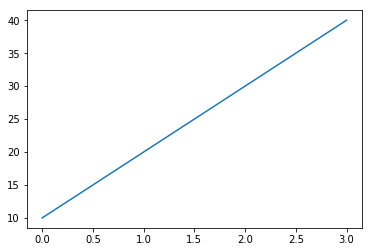

In [377]:
plt.plot([10, 20, 30, 40])
plt.show() # 콘솔에서는 show 을 안해도 화면에 보여진다.

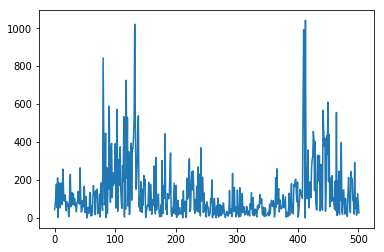

In [378]:
plt.plot(gap)

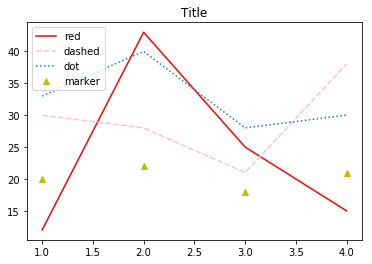

In [418]:
plt.plot([1, 2, 3, 4], [12, 43, 25, 15], 'r', label = 'red') # x, y 를 지정, 컬러는 약어로 지정도 된다. red = r
plt.plot([1, 2, 3, 4], [30, 28, 21, 38], color = 'pink', label = 'dashed', linestyle = '--') # linestyle or ls
plt.plot([1, 2, 3, 4], [33, 40, 28, 30], label = 'dot', ls = ':')
plt.plot([1, 2, 3, 4], [20, 22, 18, 21], 'y^', label = 'marker') # 마커는 color 를 뺀고 약어로 쓴다.
plt.title('Title')
plt.legend() # label 지정 후 이 명령을 써야 범례가 나온다. loc(위치) = 1 ~ 10까지의 번호로 위치를 정할 수도 있다.

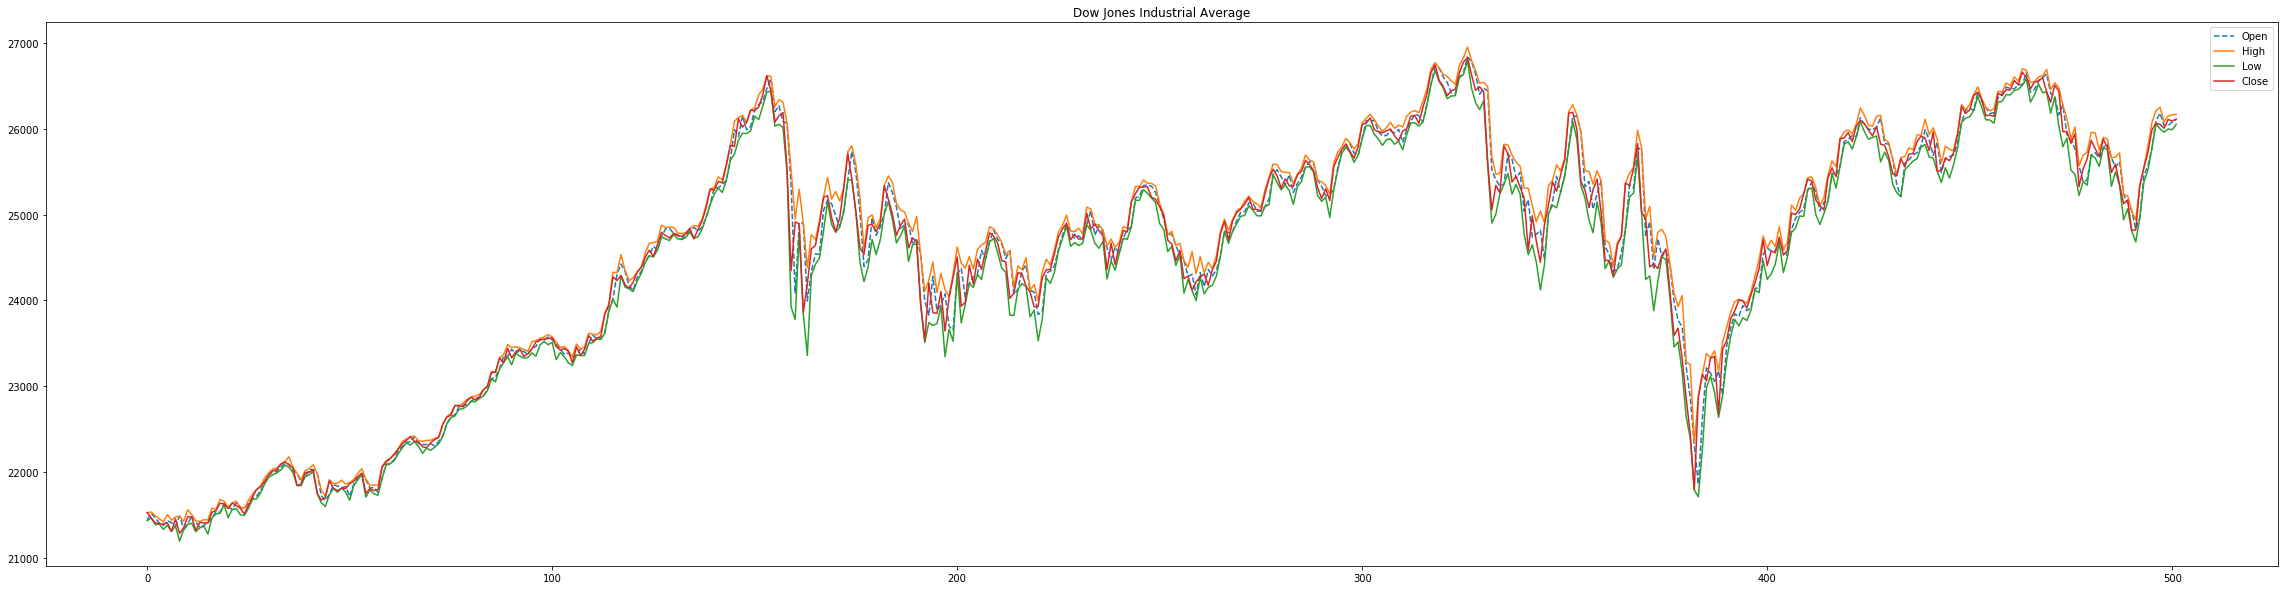

In [440]:
plt.figure(figsize=(40, 10))
plt.title('Dow Jones Industrial Average')
plt.plot(stock[:, 1], ls = '--', label = 'Open')
plt.plot(stock[:, 2], label = 'High')
plt.plot(stock[:, 3], label = 'Low')
plt.plot(stock[:, 4], label = 'Close')
plt.legend()